# 2- Prediction Using Unsupervised ML (Level- Beginner)
Task:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset into the kernel
df=pd.read_csv('Iris (2).csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#displaying the first five rows of the data frame
df.head()
df.drop('Id',axis=1,inplace=True)

In [5]:
#Renaming the entries in Species coloumn
for i in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
     df['Species']=df['Species'].replace(to_replace=i,value=i.split('-')[1])

In [6]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df_new= df.iloc[:,0:4]

In [8]:
#Data Ananlysis
df_new.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Model Selection
# K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'The Elbow Method')

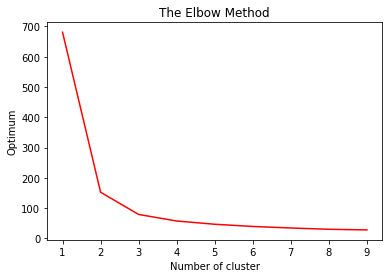

In [10]:
#Hyper Parameter Tuning /Optimization
#Using the elbow method to find the optimum number of clusters for the data
optimum=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(df_new)
    optimum.append(model.inertia_)
plt.plot(range(1,10),optimum,c='red')
plt.xlabel("Number of cluster")
plt.ylabel("Optimum")
plt.title('The Elbow Method')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

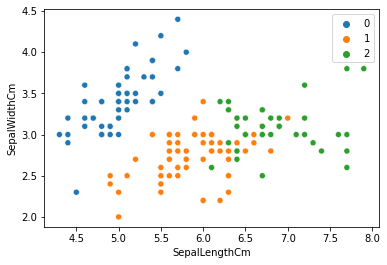

In [11]:
#The optimum clusters is where the elbow occurs i.e n=3
model=KMeans(n_clusters=3)
model.fit(df_new)
model_predict=model.predict(df_new)
sns.scatterplot(df_new.iloc[:,0],df_new.iloc[:,1],hue=model_predict,palette='tab10')

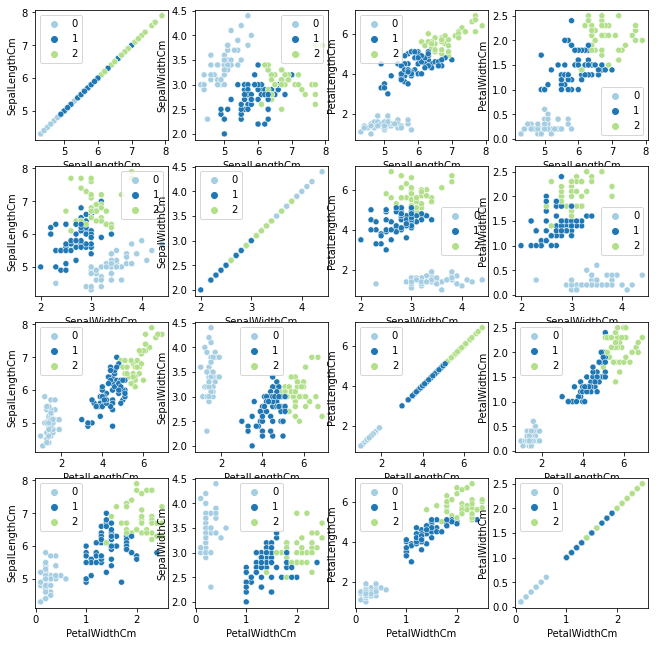

In [14]:
# Visualising the clusters - On different columns
fig,ax=plt.subplots(4,4,figsize=(11,11))
for index_i,i in enumerate(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]):
    for index_j,j in enumerate(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]):
        sns.scatterplot(df[i],df[j], hue=model_predict,palette='Paired',ax=ax[index_i,index_j])